In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('TaxiFare.csv')

In [3]:
df.head()

NameError: name 'df' is not defined

In [4]:
data.head

<bound method NDFrame.head of       unique_id  amount      date_time_of_pickup  longitude_of_pickup  \
0       26:21.0     4.5  2009-06-15 17:26:21 UTC           -73.844311   
1       52:16.0    16.9  2010-01-05 16:52:16 UTC           -74.016048   
2       35:00.0     5.7  2011-08-18 00:35:00 UTC           -73.982738   
3       30:42.0     7.7  2012-04-21 04:30:42 UTC           -73.987130   
4       51:00.0     5.3  2010-03-09 07:51:00 UTC           -73.968095   
...         ...     ...                      ...                  ...   
49995   25:15.0    15.0  2013-06-12 23:25:15 UTC           -73.999973   
49996   19:18.0     7.5  2015-06-22 17:19:18 UTC           -73.984756   
49997   53:00.0     6.9  2011-01-30 04:53:00 UTC           -74.002698   
49998   09:00.0     4.5  2012-11-06 07:09:00 UTC           -73.946062   
49999   13:14.0    10.9  2010-01-13 08:13:14 UTC           -73.932603   

       latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0               40.72

In [5]:
data['date_time_of_pickup'] = pd.to_datetime(data['date_time_of_pickup'], errors='coerce')

In [6]:
data = data.dropna(subset=['date_time_of_pickup'])

In [7]:
data['hour'] = data['date_time_of_pickup'].dt.hour
data['day_of_week'] = data['date_time_of_pickup'].dt.dayofweek
data['month'] = data['date_time_of_pickup'].dt.month

In [8]:
data = data.drop(columns=['unique_id', 'date_time_of_pickup'])

In [9]:
data = data.dropna()

In [10]:
X = data.drop(columns=['amount'])
y = data['amount']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R² Score: 0.0010098401495156617
Mean Squared Error: 92.87702887527774


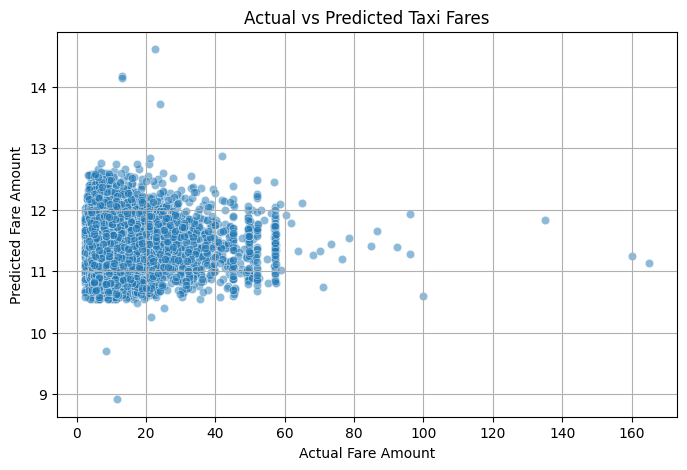

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount")
plt.title("Actual vs Predicted Taxi Fares")
plt.grid(True)
plt.show()